In [1]:
import numpy as np
from uncertainties import ufloat
import uncertainties.unumpy as unp 
from uncertainties.unumpy import (nominal_values as noms, std_devs as stds)
import matplotlib
font = {'size': 11.0}
matplotlib.rc('font', **font)
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from pylab import *
import os

In [2]:
import pandas as pd

In [3]:
path = './data/Wasserstoffatom/Ohne_Ring/Spectrums'
sav_path="./plots/PLOTS/mess_cs_long"
files = sorted(os.listdir(path))
D2=[] #[4.896,4.210,3.480,2.803,0.771,0.712,1.789,3.024,5.671,7.205,10.182,9.851,15.075,17,18.952,17.812,21.649,19.413,21.426]#2,301kHz
D3=[]#3,694kHz
D4=[]#4,979kHz
D7=[]#7,433kHz
a=np.arange(0,185,10)#winkel

#print(files)
#print(a)
for f in files:
    temp = np.genfromtxt(f"{path}/{f}",delimiter=" ")
    temp_f = temp[:,0]
    temp_D = temp[:,1]
    index2 = np.where(temp_f == 2300)
    index3 = np.where(temp_f == 3690)
    index4 = np.where(temp_f == 4970)
    index7 = np.where(temp_f == 7430)
    D2.append(temp_D[index2][0])
    D3.append(temp_D[index3][0])
    D4.append(temp_D[index4][0])
    D7.append(temp_D[index7][0])
arrays = [D2,D3,D4,D7]

In [9]:
y = np.linspace(0, 360, 1000) * np.pi/180

def fkt_2p0(theta):
    return np.sqrt(3/np.pi * (np.cos(theta))**2)/2

def fkt_3d0(theta):
    return np.sqrt(5/(np.pi)*(3*(np.cos(theta))**2 - 1)**2)/4

def fkt_4f0(theta):
    return np.sqrt(7/(np.pi)*(5*(np.cos(theta))**3 - 3*np.cos(theta))**2)/4

def fkt_6h0(theta):
    return np.sqrt(11/(np.pi)*(63*(np.cos(theta))**5-70*(np.cos(theta))**3+15*np.cos(theta))**2)/16


def alpha_to_theta(alpha):
    return np.arccos(0.5*np.cos(alpha*np.pi/180) - 0.5)

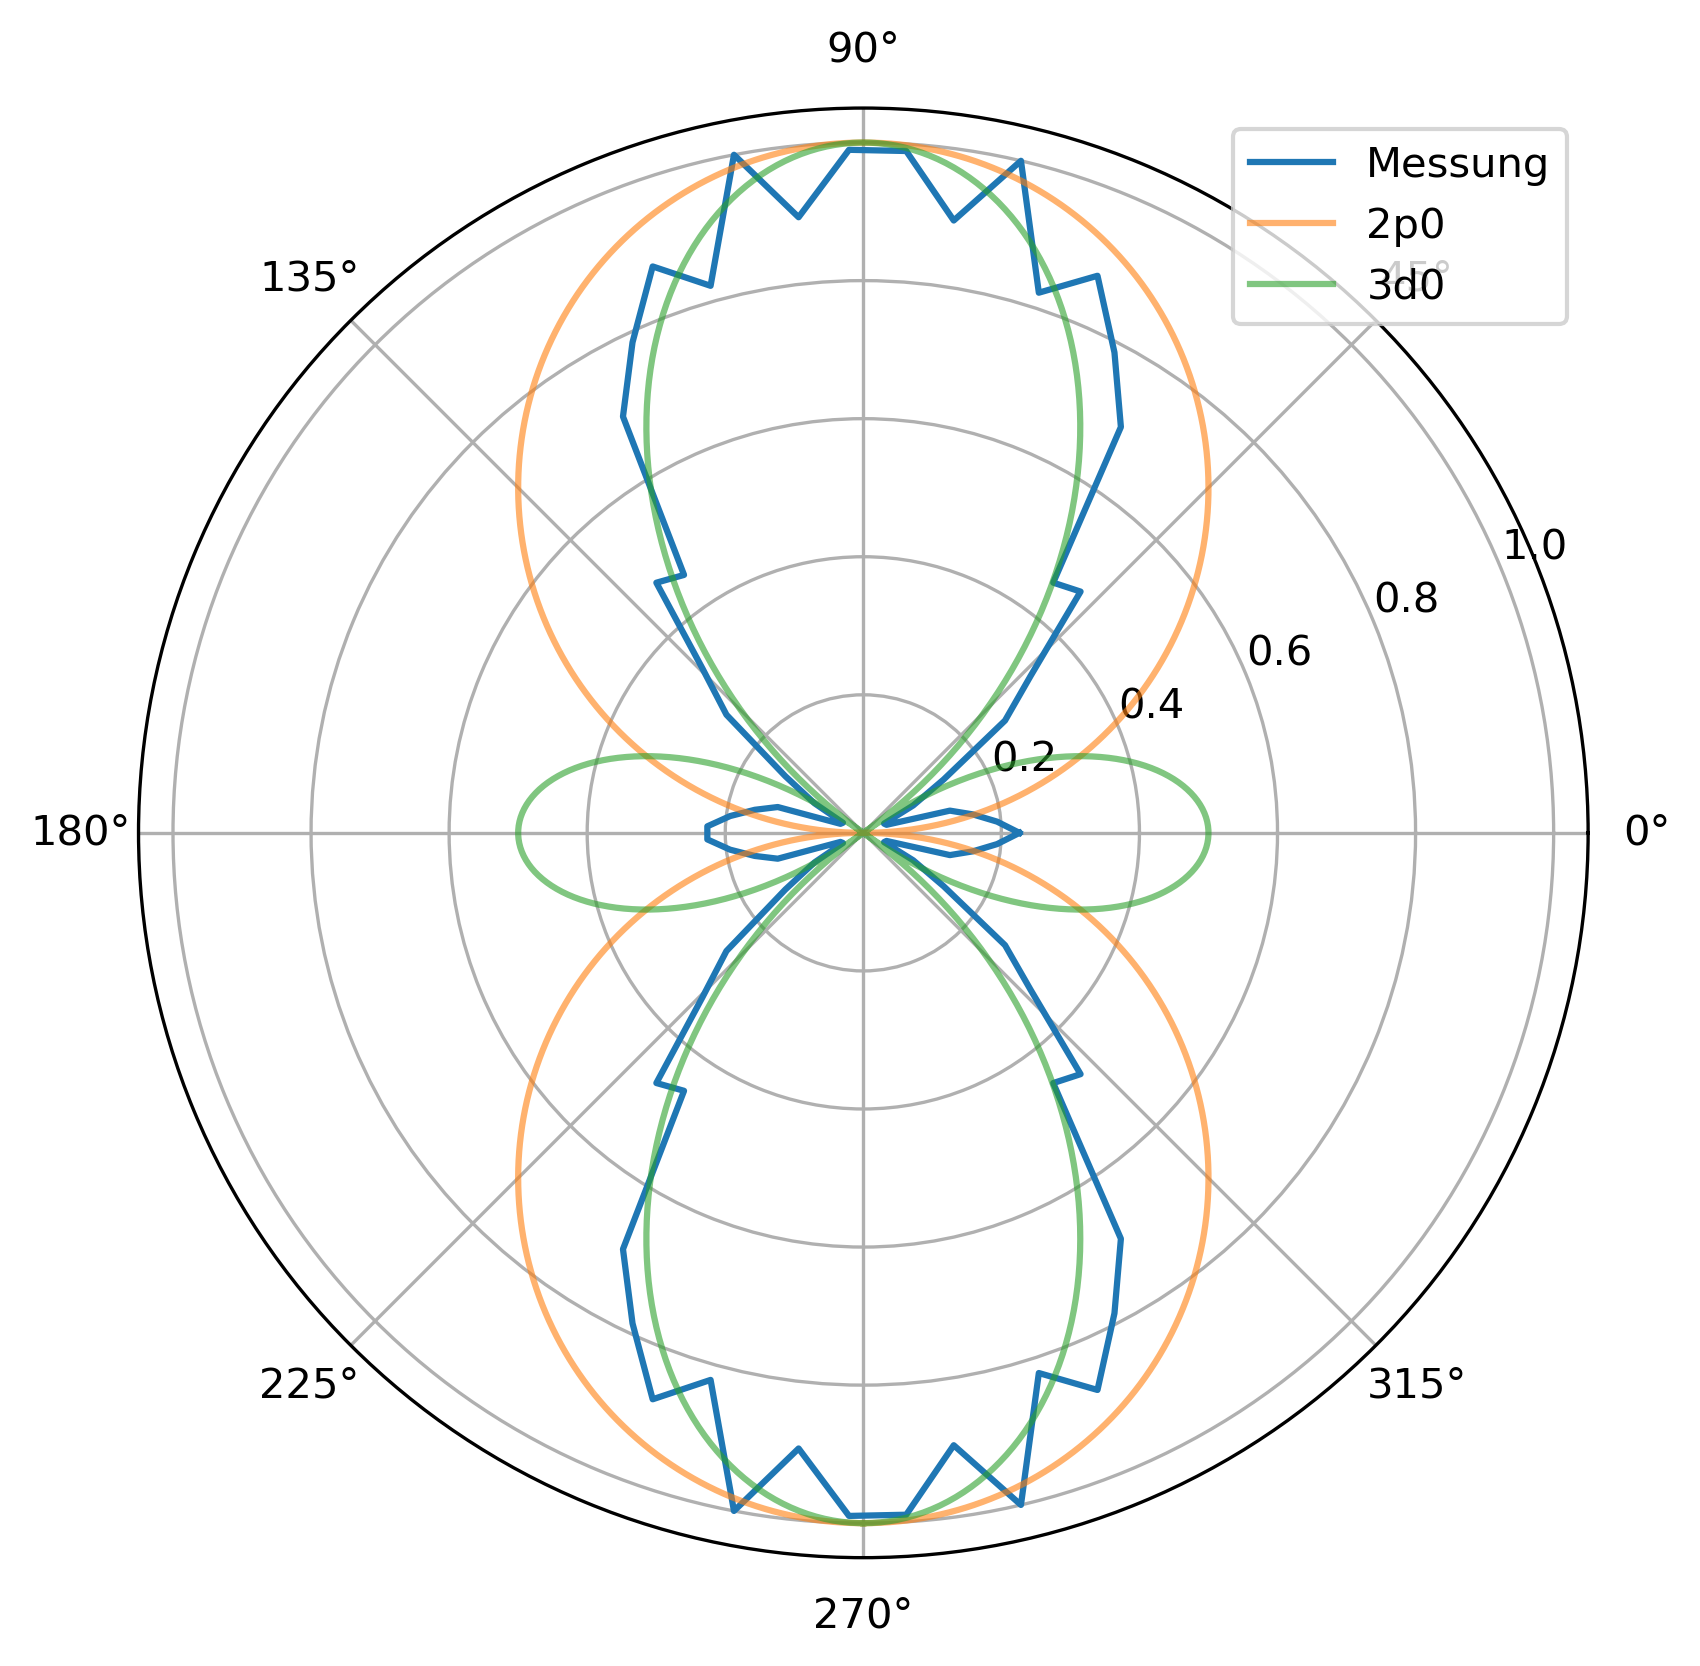

In [49]:
alpha = alpha_to_theta(np.arange(0, 190, 10))

fig, axs = plt.subplots(figsize=(6.4,6.4),dpi=300,subplot_kw={'projection': 'polar'})

rho = np.concatenate([D2,D2[::-1],D2,D2[::-1]])
r = np.linspace(0, 1, len(rho))-1
theta = 2 * np.pi * r
a = np.arange(0,185,10)

axs.plot(theta,rho/np.max(rho), label="Messung")
axs.plot(y-0.5*np.pi, fkt_2p0(y)/(np.max(fkt_2p0(y))),alpha=0.6, label="2p0")
axs.plot(y-0.5*np.pi, fkt_3d0(y)/(np.max(fkt_3d0(y))),alpha=0.6, label="3d0")
#axs.set_rticks([1])
plt.legend(loc="best")

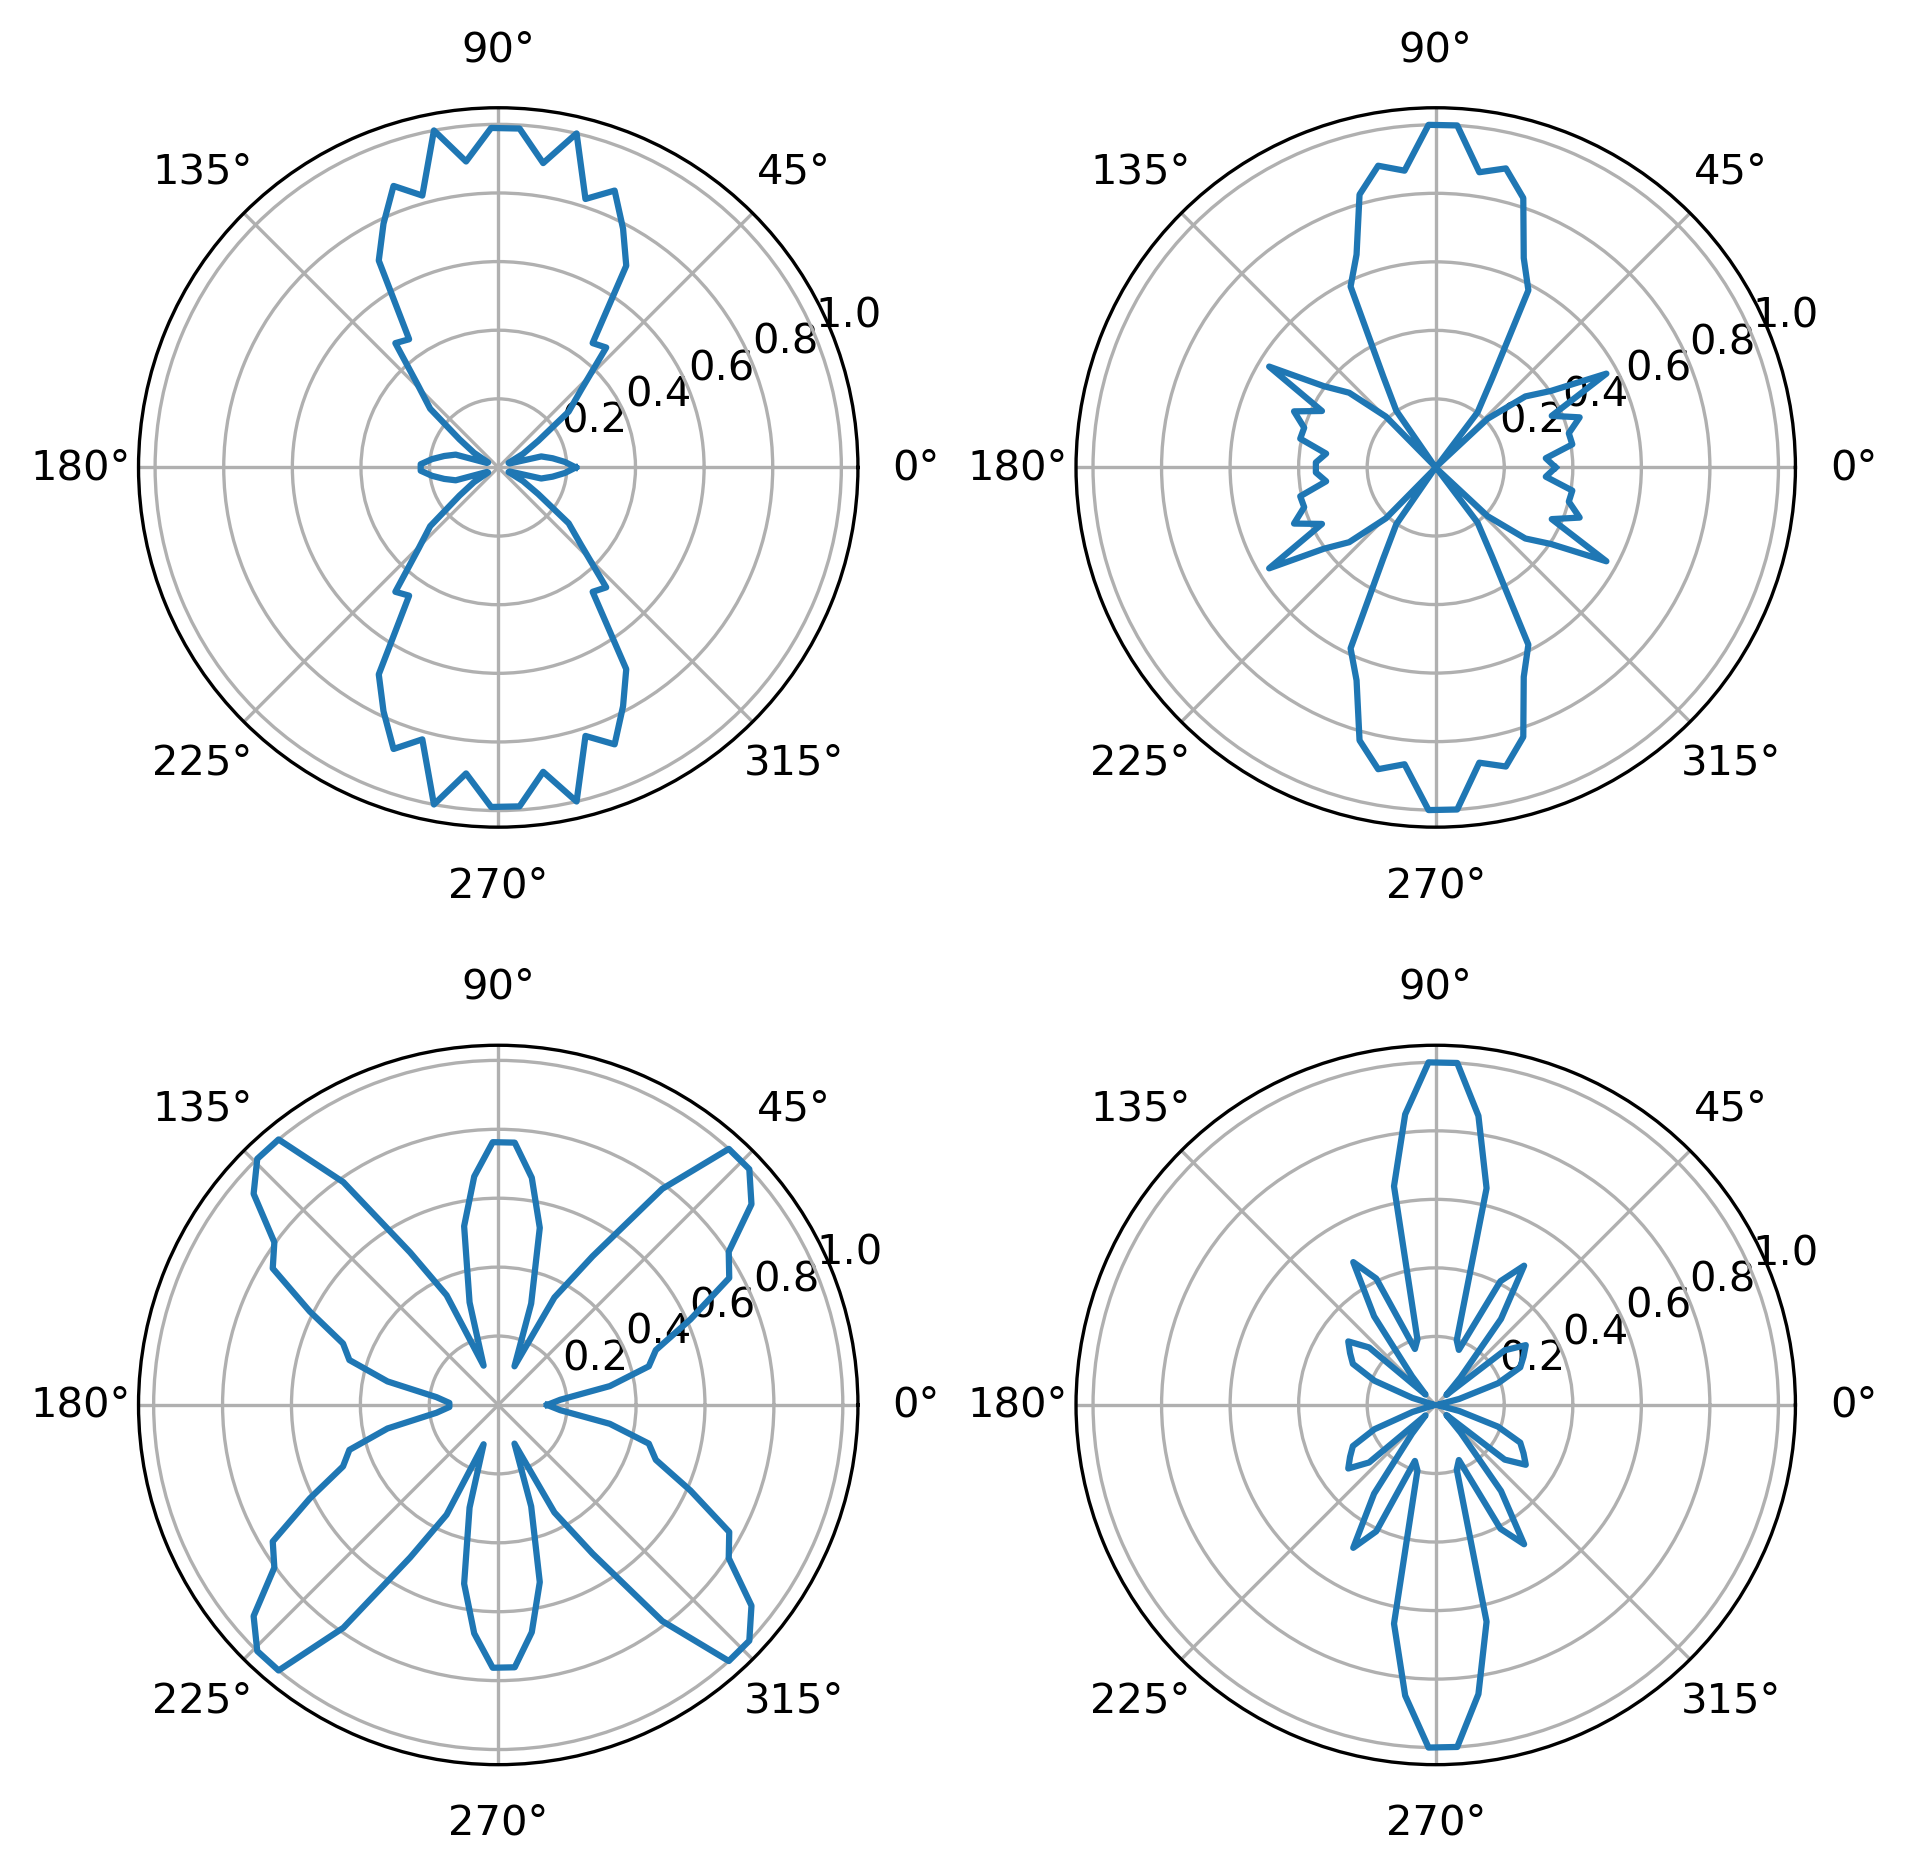

In [27]:
fig,ax = plt.subplots(2,2,figsize=(6.4,6.4),dpi=300,subplot_kw={'projection': 'polar'})
count = 0
for i in (0,1):
    for j in (0,1):
        rho = np.concatenate([arrays[count],arrays[count][::-1],arrays[count],arrays[count][::-1]])
        r = np.linspace(1, 2, len(rho))
        theta = 2 * np.pi * r
        #ax[i,j].set_rlim(0,35)
        #ax[i,j].set_rticks([5, 15, 25])  # Less radial ticks
        #ax[i,j].set_rlabel_position(-22.5)  # Move radial labels away from plotted line
        ax[i,j].plot(theta,rho/np.max(rho))
        count = count+1
fig.tight_layout()

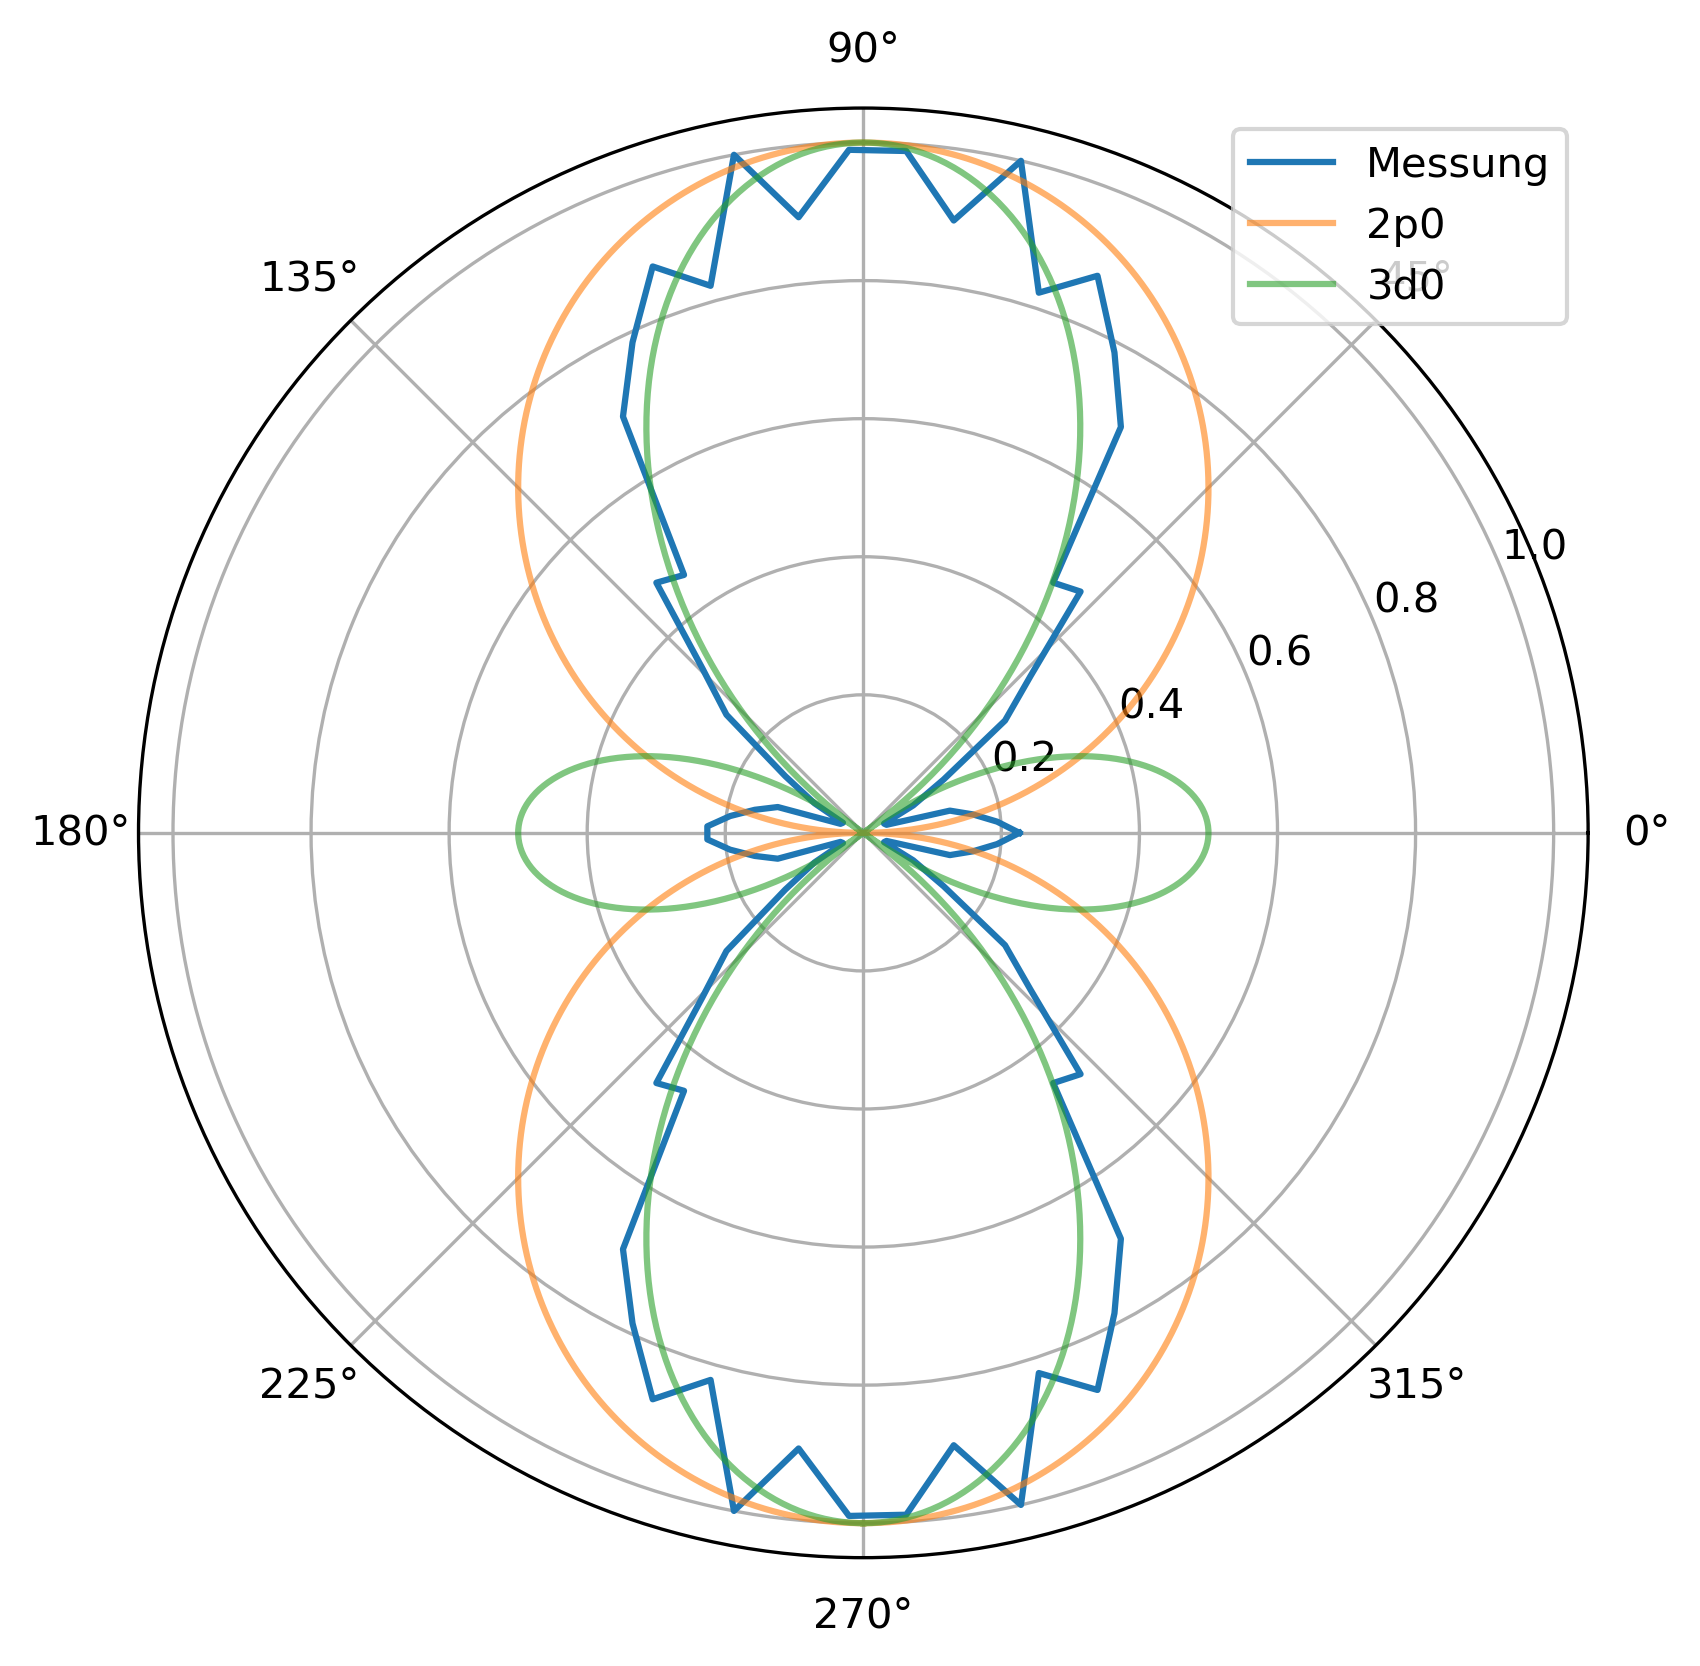

In [60]:
fig, axs = plt.subplots(figsize=(6.4,6.4),dpi=300,subplot_kw={'projection': 'polar'})

rho = np.concatenate([D2,D2[::-1],D2,D2[::-1]])
r = np.linspace(0, 1, len(rho))-1
theta = 2 * np.pi * r
a = np.arange(0,185,10)

axs.plot(theta,rho/np.max(rho), label="Messung")
axs.plot(y-0.5*np.pi, fkt_2p0(y)/(np.max(fkt_2p0(y))),alpha=0.6, label="2p0")
axs.plot(y-0.5*np.pi, fkt_3d0(y)/(np.max(fkt_3d0(y))),alpha=0.6, label="3d0")
#axs.set_rticks([1])
plt.legend(loc="best")

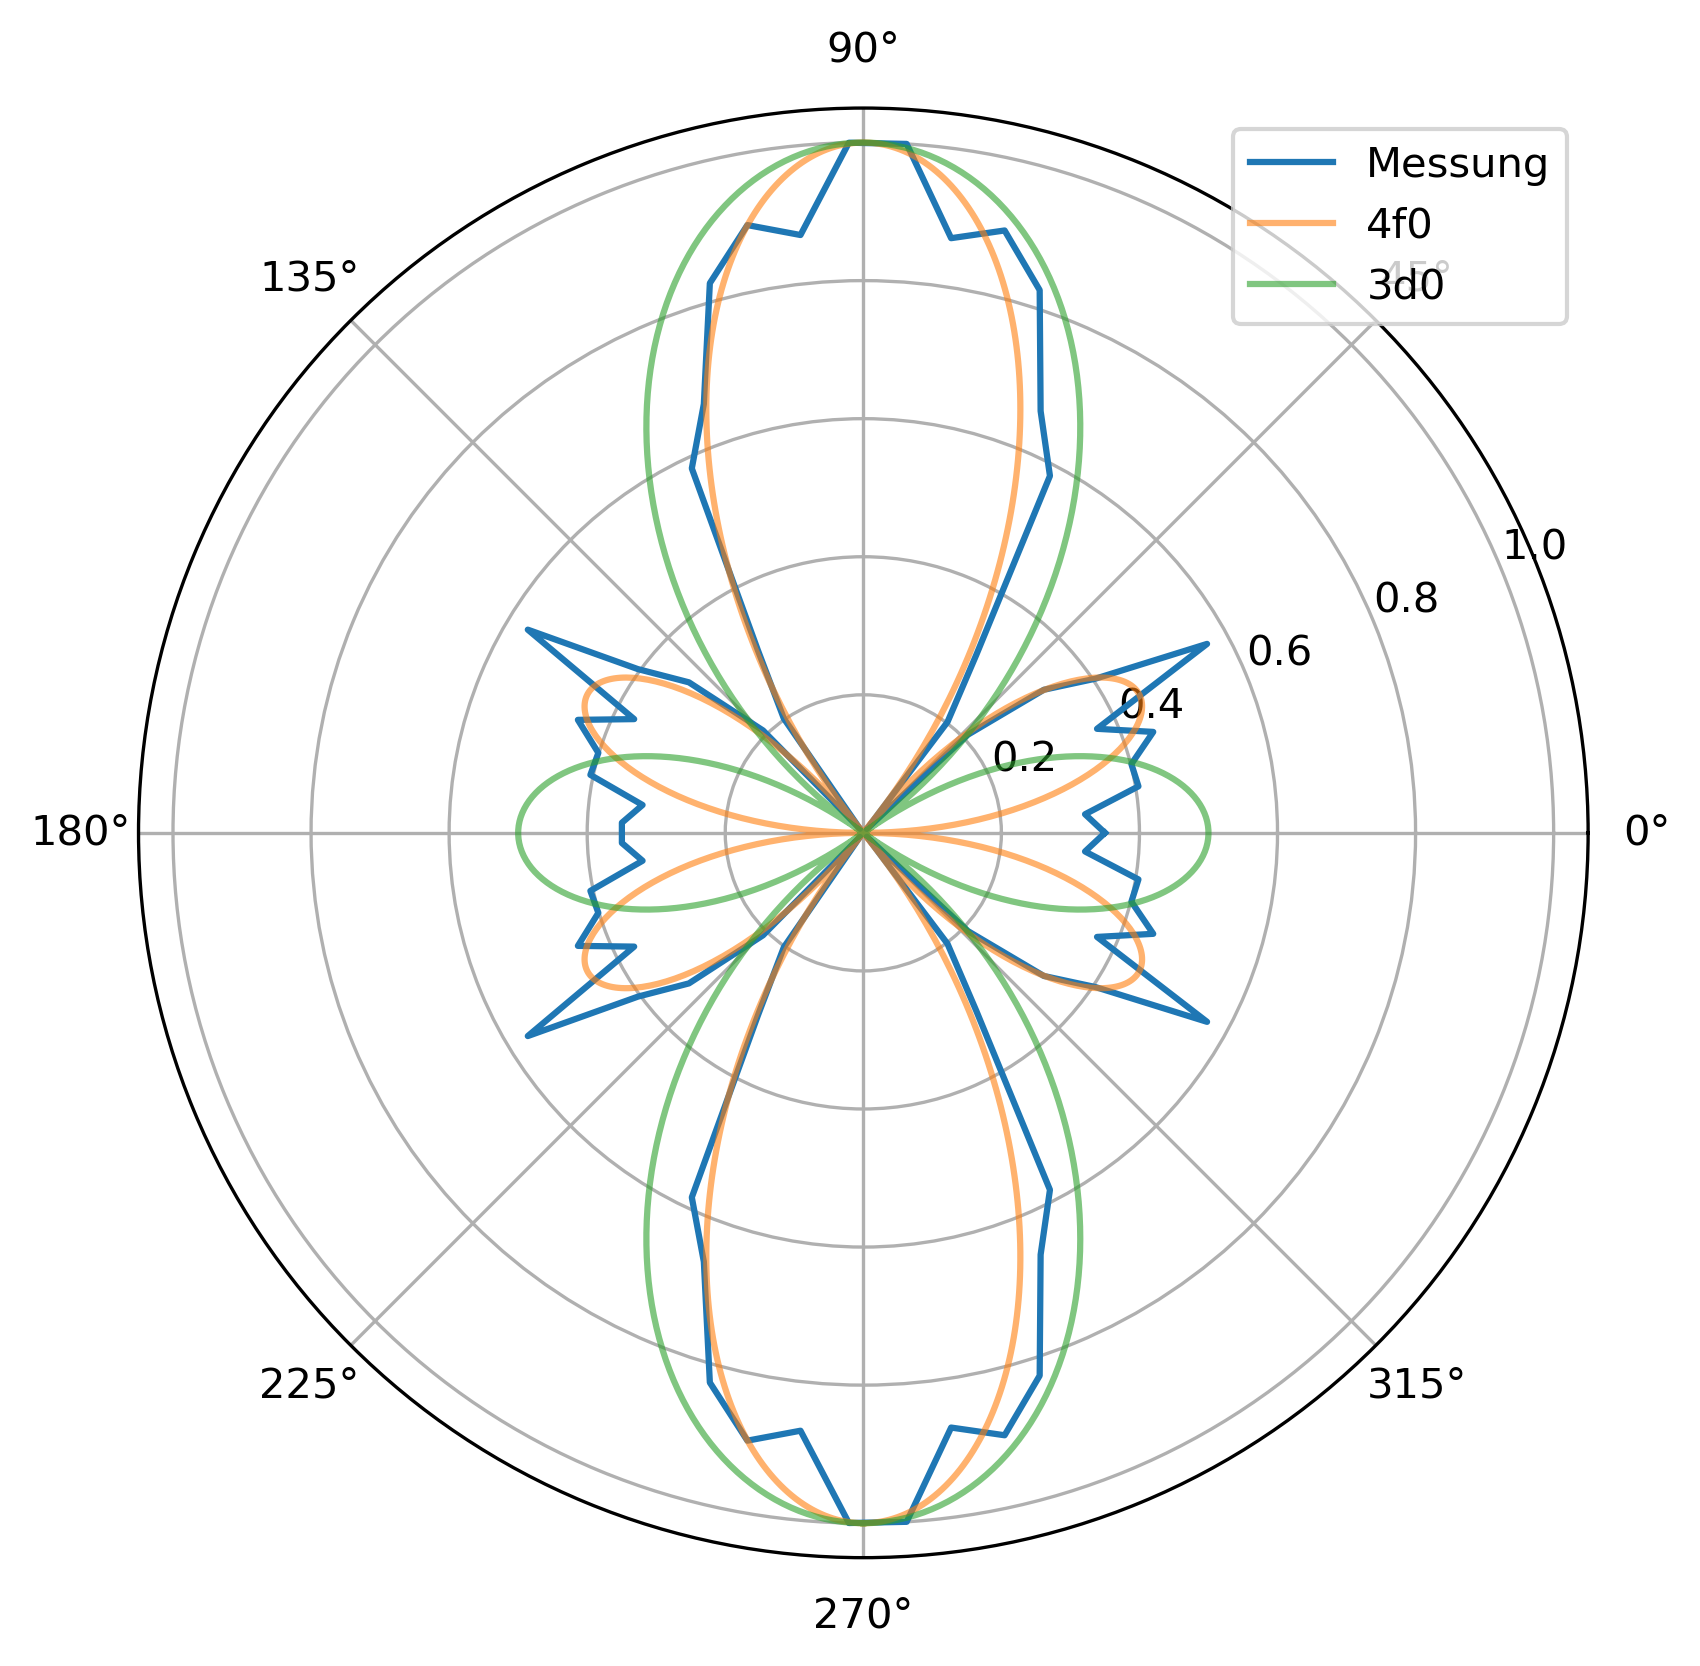

In [57]:
fig, axs = plt.subplots(figsize=(6.4,6.4),dpi=300,subplot_kw={'projection': 'polar'})

rho = np.concatenate([D3,D3[::-1],D3,D3[::-1]])
r = np.linspace(1, 2, len(rho))
theta = 2 * np.pi * r
a=np.arange(0,185,10)

axs.plot(theta,rho/np.max(rho), label="Messung")
axs.plot(y-0.5*np.pi, fkt_4f0(y)/(np.max(fkt_4f0(y))), alpha=0.6, label="4f0")
axs.plot(y-0.5*np.pi, fkt_3d0(y)/(np.max(fkt_3d0(y))),alpha=0.6, label="3d0")
#axs.set_rticks([1])
plt.legend(loc="best")

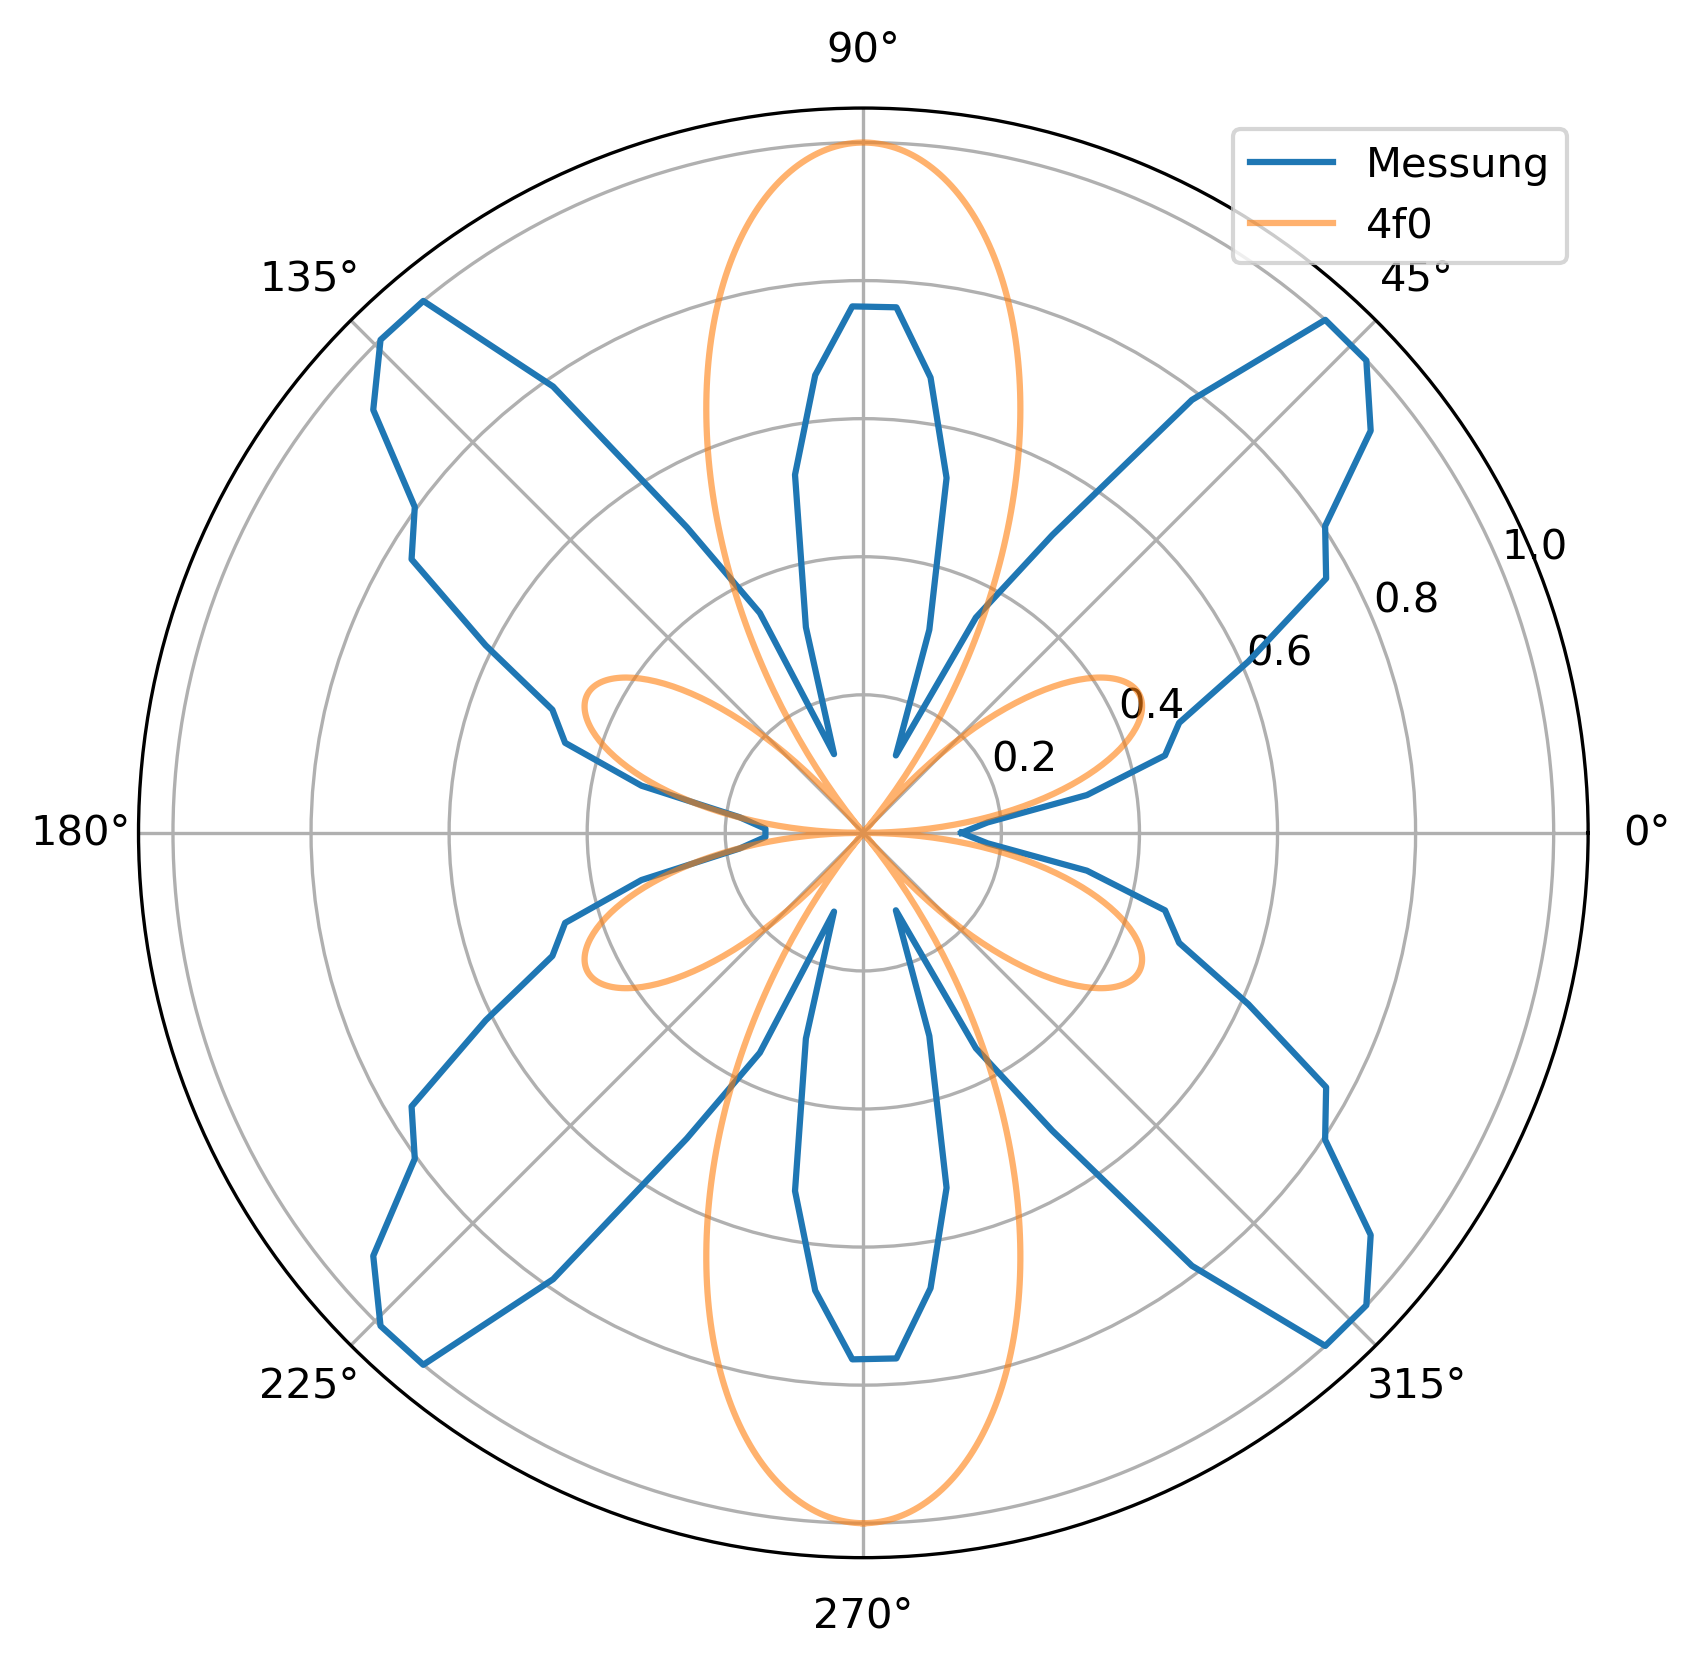

In [59]:
fig, axs = plt.subplots(figsize=(6.4,6.4),dpi=300,subplot_kw={'projection': 'polar'})

rho = np.concatenate([D4,D4[::-1],D4,D4[::-1]])
r = np.linspace(1, 2, len(rho))
theta = 2 * np.pi * r
a=np.arange(0,185,10)

axs.plot(theta,rho/np.max(rho), label="Messung")
axs.plot(y-0.5*np.pi, fkt_4f0(y)/(np.max(fkt_4f0(y))), alpha=0.6, label="4f0")
#axs.plot(y-0.5*np.pi, fkt_3d0(y)/(np.max(fkt_3d0(y))),alpha=0.6, label="3d0")
#axs.set_rticks([1])
plt.legend(loc="best")

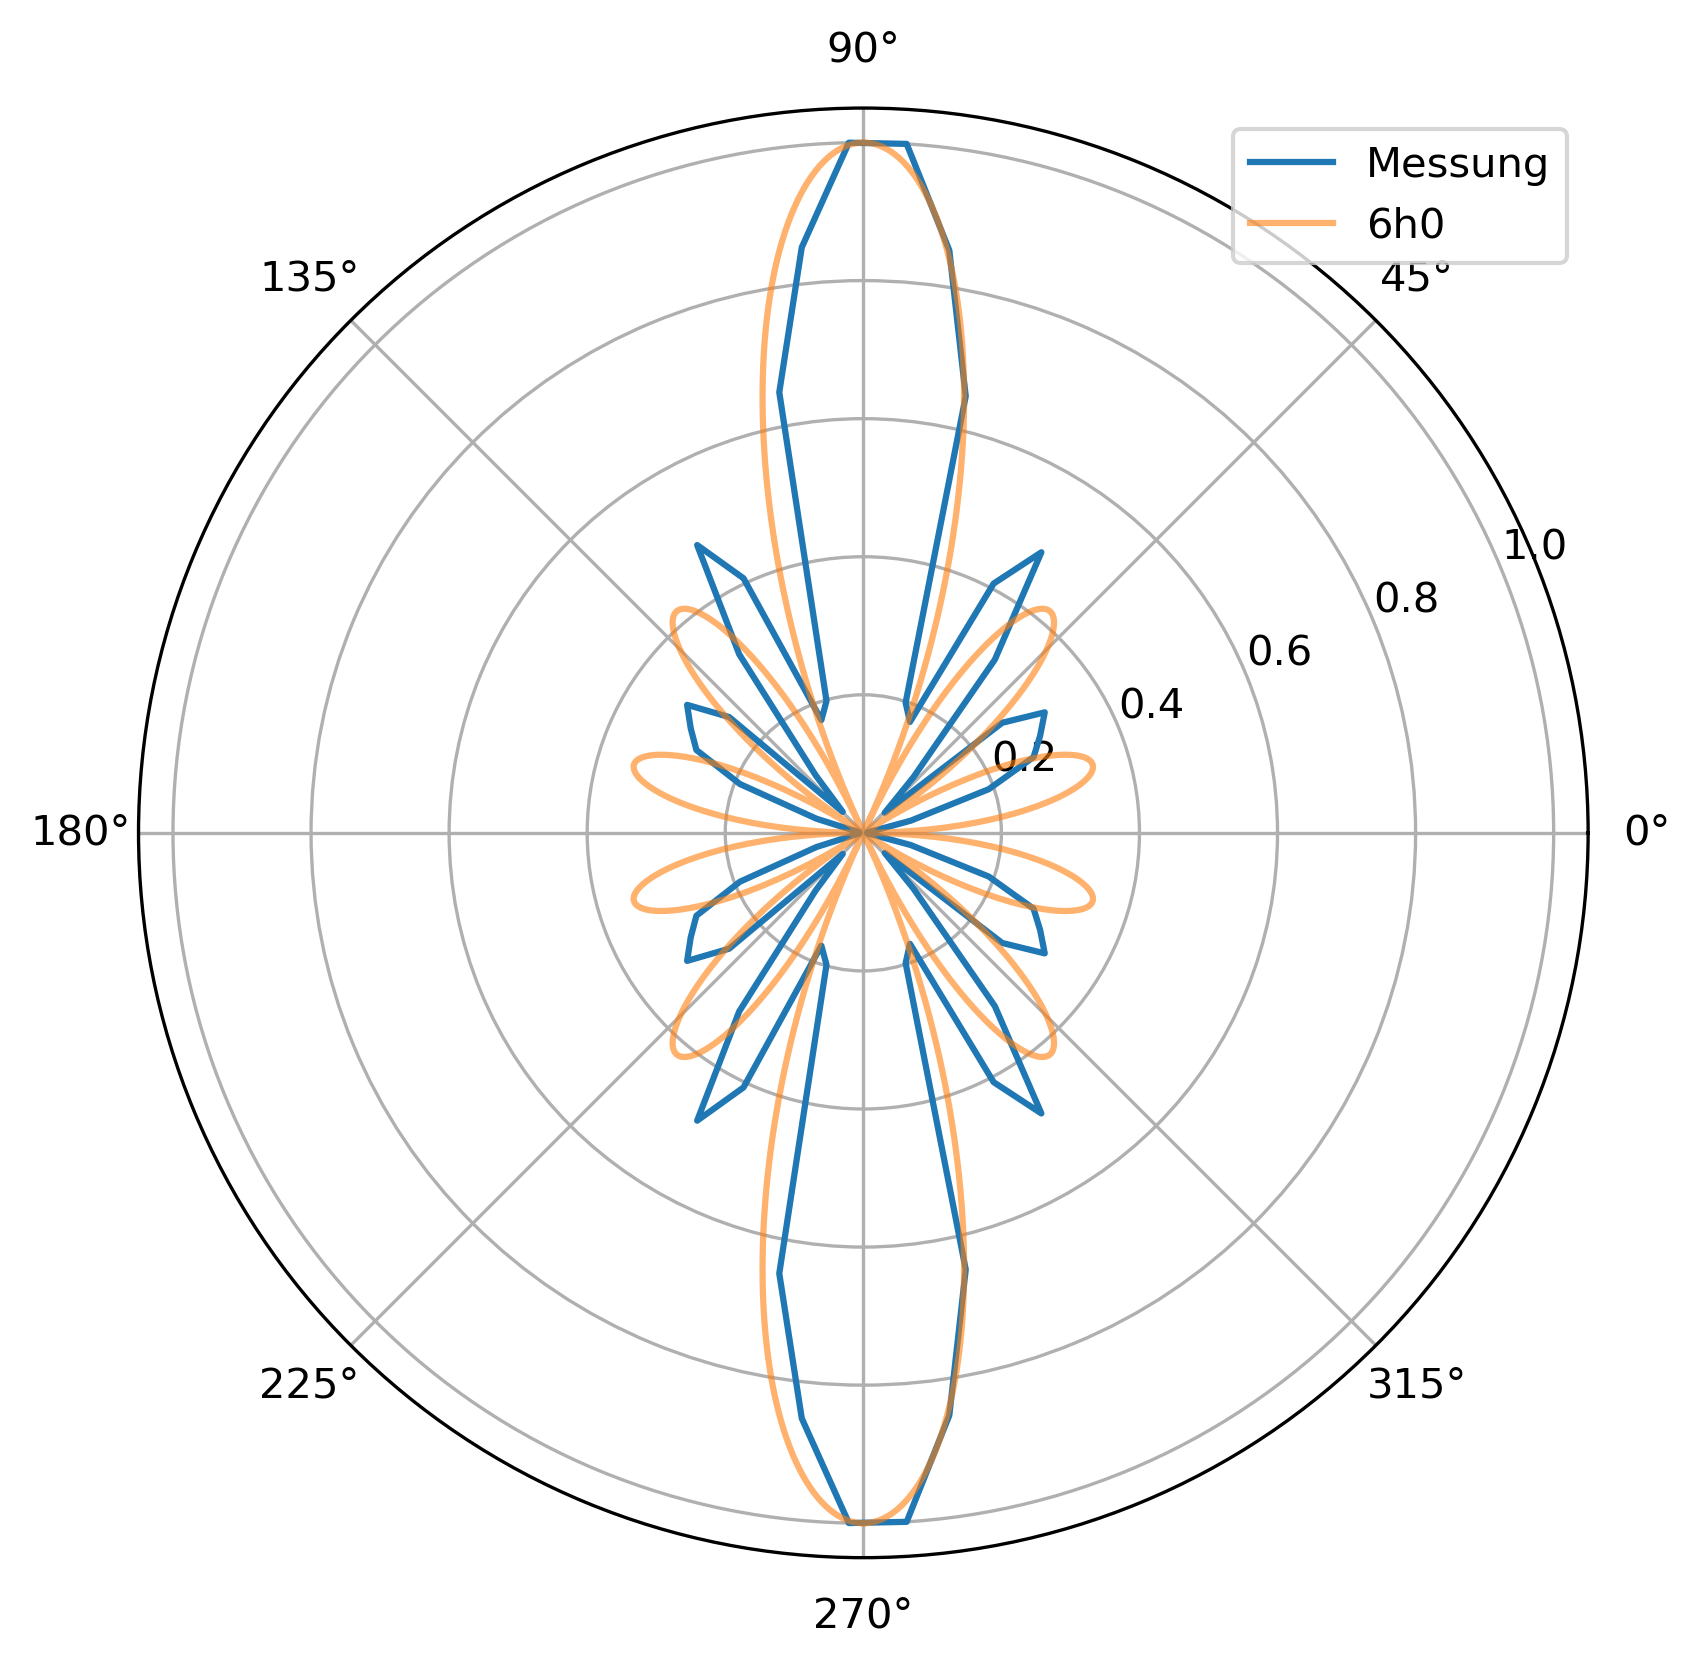

In [52]:
fig, axs = plt.subplots(figsize=(6.4,6.4),dpi=300,subplot_kw={'projection': 'polar'})

rho = np.concatenate([D7,D7[::-1],D7,D7[::-1]])
r = np.linspace(1, 2, len(rho))
theta = 2 * np.pi * r
a=np.arange(0,185,10)

axs.plot(theta,rho/np.max(rho), label="Messung")
axs.plot(y-0.5*np.pi, fkt_6h0(y)/(np.max(fkt_6h0(y))),alpha=0.6, label="6h0")
#axs.set_rticks([1])
plt.legend(loc="best")

In [ ]:
#Zustandsaufspaltung
f = np.genfromtxt("data/Wasserstoffatom/Ring/Spektrum_Ring_3mm.txt",skip_header=1,usecols=(0))
D = np.genfromtxt("data/Wasserstoffatom/Ring/Spektrum_Ring_3mm.txt",skip_header=1,usecols=(1))

plt.figure(figsize=(6.4,3.96),dpi=300)
plt.title("H-Atom 180° 3mm")
plt.plot(f,D,label="H-Atom")
vlines(2292, 0, 23.5, colors='r', linestyles='--',alpha=0.6)
vlines(2229, 0, 13.5, colors='r', linestyles='--',alpha=0.6,label=r"$\Delta f=63\,$Hz")
plt.ylabel(r"$P\,/\,$will. Einheit")
plt.xlabel(r"$f\,/\,$Hz")
plt.legend(loc="best")
plt.tight_layout()
#plt.savefig("plots/Hatom/zustandsaufspaltung.pdf",bbox_inches = "tight")

In [ ]:
f=np.genfromtxt("data/Wasserstoffatom/Ring/Spektrum_Ring_6mm.dat",skip_header=1,usecols=(0))
D=np.genfromtxt("data/Wasserstoffatom/Ring/Spektrum_Ring_6mm.dat",skip_header=1,usecols=(1))

plt.figure(figsize=(6.4,3.96),dpi=300)
plt.title("H-Atom 180° 6mm")
plt.plot(f,D,label="H-Atom")
vlines(2276, 0, 24.1, colors='r', linestyles='--',alpha=0.6)
vlines(2164, 0, 12.1, colors='r', linestyles='--',alpha=0.6,label=r"$\Delta f=112\,$Hz")
plt.ylabel(r"$P\,/\,$will. Einheit")
plt.xlabel(r"$f\,/\,$Hz")
plt.legend(loc="best")
plt.tight_layout()
#plt.savefig("plots/Hatom/zustandsaufspaltung_6.pdf",bbox_inches = "tight")

In [ ]:
f=np.genfromtxt("data/Wasserstoffatom/Ring/Spektrum_Ring_9mm.dat",skip_header=1,usecols=(0))
D=np.genfromtxt("data/Wasserstoffatom/Ring/Spektrum_Ring_9mm.dat",skip_header=1,usecols=(1))

plt.figure(figsize=(6.4,3.96),dpi=300)
plt.title("H-Atom 180° 9mm")
plt.plot(f,D,label="H-Atom")
vlines(2266, 0, 12, colors='r', linestyles='--',alpha=0.6)
vlines(2095, 0, 15.5, colors='r', linestyles='--',alpha=0.6,label=r"$\Delta f=171\,$Hz")
plt.ylabel(r"$P\,/\,$will. Einheit")
plt.xlabel(r"$f\,/\,$Hz")
plt.legend(loc="best")
plt.tight_layout()
#plt.savefig("plots/Hatom/zustandsaufspaltung_9.pdf",bbox_inches = "tight")
#plt.close()

In [ ]:
plt.figure(figsize=(6.4,3.96),dpi=300)
plt.title("f-Aufspaltung")
plt.plot([3,6,9],[63,112,171],"o")
plt.plot([3,6,9],[63,112,171],"-")
plt.ylabel(r"$\Delta f\,/\,$Hz")
plt.xlabel(r"Ringdicke $d\,/\,$mm")
plt.tight_layout()
#plt.savefig("plots/Hatom/faufspaltung.pdf",bbox_inches = "tight")
#plt.close()

In [ ]:
#Wasserstoffmol
f=np.genfromtxt("data/Wasserstoffmolekuel/Spektrum_Ring_15mm.dat",skip_header=1,usecols=(0))
D=np.genfromtxt("data/Wasserstoffmolekuel/Spektrum_Ring_15mm.dat",skip_header=1,usecols=(1))

plt.figure(figsize=(6.4,3.96),dpi=300)
plt.title("H2-Mol. 180° 15mm")
plt.plot(f,D,label="H2-Mol.")
vlines(2297, 0, 5, colors='r', linestyles='--',alpha=0.6,label="2297 Hz")
vlines(2304, 0, 10.5, colors='r', linestyles='--',alpha=0.6,label="2304 Hz")
vlines(2416, 0, 6, colors='r', linestyles='--',alpha=0.6,label="2416 Hz")
plt.ylabel(r"$P\,/\,$will. Einheit")
plt.xlabel(r"$f\,/\,$Hz")
plt.legend(loc="best")
#plt.savefig("plots/Hatom/zustandsaufspaltung_mol15.pdf",bbox_inches = "tight")
#plt.show()
#plt.close()

In [ ]:
#resonanzfrequenzen plot
f5=np.genfromtxt("data/Wasserstoffmolekuel/Spektrum_Ring_5mm.dat",skip_header=1,usecols=(0))
D5=np.genfromtxt("data/Wasserstoffmolekuel/Spektrum_Ring_5mm.dat",skip_header=1,usecols=(1))
f10=np.genfromtxt("data/Wasserstoffmolekuel/Spektrum_Ring_10mm.dat",skip_header=1,usecols=(0))
D10=np.genfromtxt("data/Wasserstoffmolekuel/Spektrum_Ring_10mm.dat",skip_header=1,usecols=(1))
f15=np.genfromtxt("data/Wasserstoffmolekuel/Spektrum_Ring_15mm.dat",skip_header=1,usecols=(0))
D15=np.genfromtxt("data/Wasserstoffmolekuel/Spektrum_Ring_15mm.dat",skip_header=1,usecols=(1))
f20=np.genfromtxt("data/Wasserstoffmolekuel/Spektrum_Ring_20mm.dat",skip_header=1,usecols=(0))
D20=np.genfromtxt("data/Wasserstoffmolekuel/Spektrum_Ring_20mm.dat",skip_header=1,usecols=(1))

plt.figure(figsize=(6.4,3.96),dpi=300)
#plt.plot(f5,D5,label="5mm")
plt.plot(f10,D10,label="10mm")
plt.plot(f15,D15,label="15mm")
plt.plot(f20,D20,label="20mm")
plt.legend()
#plt.close()

In [ ]:
d=[10,15,20]
R1=[2295,2295,2295]#1. Resonanz
R2=[2303,2304,2305]#2. Resonanz
R3=[2374,2417,2456]#2. Resonanz

In [ ]:
plt.figure(figsize=(6.4,3.96),dpi=300)
plt.title("Resonanzfrequenz")
plt.plot(d,R1,"xg",label="1. Resonanz")
plt.plot(d,R1,"--g")
plt.plot(d,R2,"xk",label="2. Resonanz")
plt.plot(d,R2,"--k")
plt.plot(d,R3,"xb",label="3. Resonanz")
plt.plot(d,R3,"--b")
plt.ylabel(r"f$\,/\,$Hz")
plt.xlabel(r"Blendendurchmesser$\,/\,$mm")
plt.legend(loc="best")
#plt.savefig("plots/Hatom/res_blende.pdf",bbox_inches = "tight")
#plt.show()
#plt.close()

In [ ]:
fig,ax = plt.subplots(3,1,figsize=(6.4,1.5*3.96),dpi=300)
ax[0].set_title("Resonanzfrequenz")
ax[0].plot(d,R1,"xg",label="1. Resonanz")
ax[0].plot(d,R1,"--g")
ax[1].plot(d,R2,"xk",label="2. Resonanz")
ax[1].plot(d,R2,"--k")
ax[2].plot(d,R3,"xb",label="3. Resonanz")
ax[2].plot(d,R3,"--b")
ax[2].set_xlabel(r"Blendendurchmesser$\,/\,$mm")
for i in (0,1):
    ax[i].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False
    )
for i in (0,1,2):
    ax[i].set_ylabel(r"f$\,/\,$Hz")
    ax[i].legend(loc="upper left")
    
fig.tight_layout()
#plt.savefig("plots/Hatom/res_blende2.pdf",bbox_inches = "tight")
#plt.show()
#plt.close()